In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [5]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [6]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [42]:
alpha = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
alpha_map = {}

for i in range(26):
    alpha_map[i] = alpha[i]

Letter W


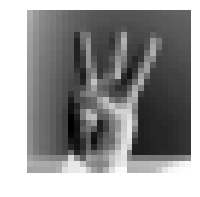

In [160]:
random_pick = np.random.randint(0,len(train))
print('Letter',alpha_map[train.iloc[random_pick,0]])
fig, ax = plt.subplots(1,1,figsize=(3,3))
first = np.array(train.iloc[random_pick,1:]).reshape(28,28)
ax.axis('off')
ax.imshow(first,cmap='Greys')

In [57]:
pixels = [col for col in train.columns if col != 'label']
X_train, X_cv, y_train, y_cv = train_test_split(train[pixels],train['label'],test_size=.3)

In [113]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='logistic',solver='lbfgs',
                   random_state = 1,max_iter=1000)
clf.fit(X_train,y_train)
predictions = clf.predict(X_cv)

In [114]:
accuracy_score(y_cv, predictions)

0.61624377807454167

In [142]:
clf = MLPClassifier(hidden_layer_sizes=(200,200),activation='logistic',solver='lbfgs',
                   random_state = 1,max_iter=1000)
clf.fit(train[pixels],train['label'])
predictions = clf.predict(test[pixels])

In [143]:
accuracy_score(test['label'],predictions)

0.59551031790295594

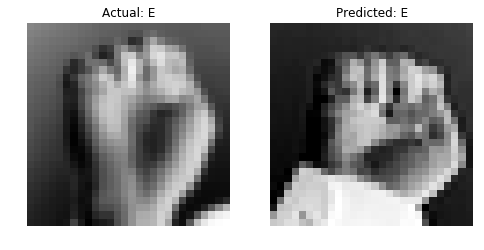

In [167]:
random_pick = np.random.randint(0,len(test))
actual = alpha_map[test.iloc[random_pick,0]]
predicted = alpha_map[predictions[random_pick]]
fig, ax = plt.subplots(1,2,figsize=(8,8))
pick = np.array(test.iloc[random_pick,1:]).reshape(28,28)
ax[0].axis('off')
ax[0].imshow(pick,cmap='Greys')
ax[0].set_title('Actual: '+actual)
example = np.array(train[train['label'] == predictions[random_pick]].iloc[0,1:]).reshape(28,28)
ax[1].axis('off')
ax[1].imshow(example,cmap='Greys')
ax[1].set_title('Predicted: '+predicted)